## We have a database of AUDI vehicles. Objective: Explore the data and build a model to determine the price of each vehicle.

### We import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

### Let's read the CSV file and create a Pandas Data Frame

In [3]:
df_audi = pd.read_csv(r'https://raw.githubusercontent.com/gelono/Data-Analysis/master/audi.csv')
df_audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


### Let's see descriptive statistics

In [4]:
print(df_audi.info())
df_audi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
model           10668 non-null object
year            10668 non-null int64
price           10668 non-null int64
transmission    10668 non-null object
mileage         10668 non-null int64
fuelType        10668 non-null object
tax             10668 non-null int64
mpg             10668 non-null float64
engineSize      10668 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


### As you can see, the data is quite qualitative.

### Visualize data columns and look at outliers, distributions and possible correlations (dependencies)

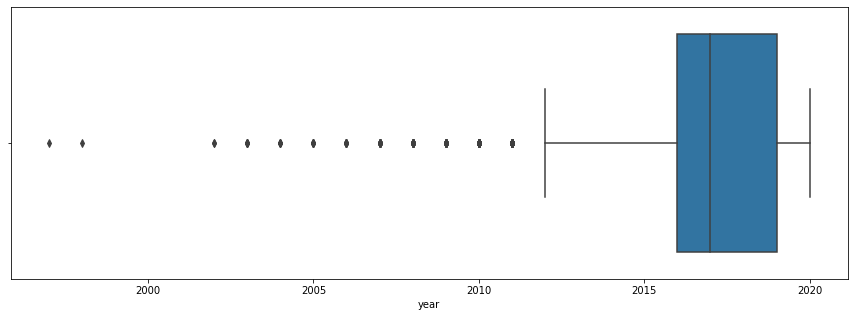

In [5]:
plt.subplots(figsize=(15,5))
sns.boxplot(df_audi['year'])

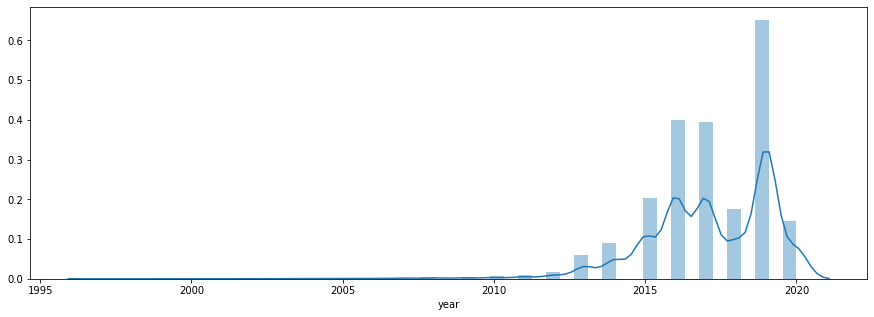

In [6]:
plt.subplots(figsize=(15,5))
sns.distplot(df_audi['year'])

### Most of the cars were produced after 2011. The rest of the data on the year of production is not considered for emissions or anomalies.

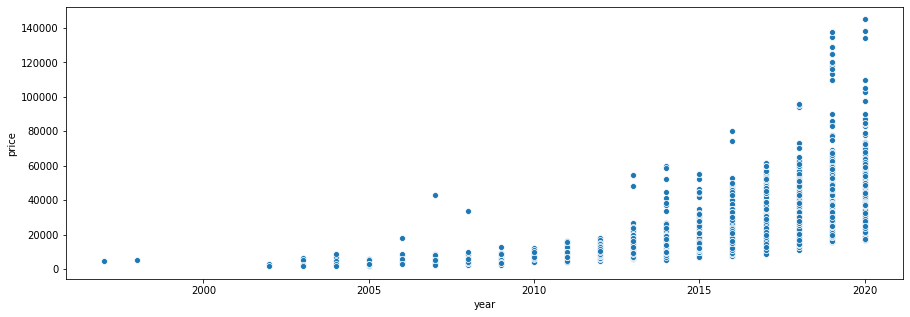

In [7]:
plt.subplots(figsize=(15,5))
sns.scatterplot(df_audi['year'], df_audi['price'])

### From the graph of dependence (price / year of production) it is clear that the price tends to increase with a later year of production.

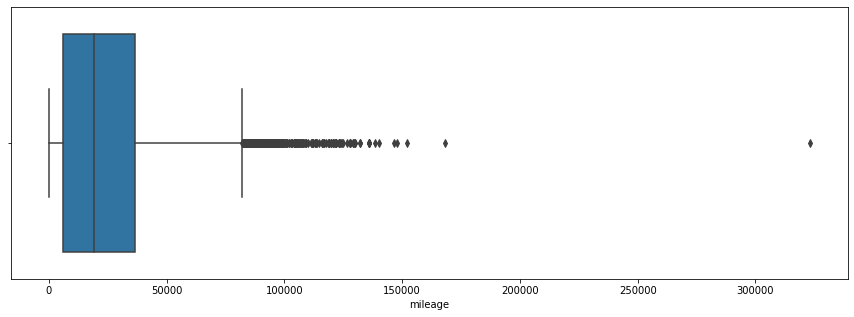

In [8]:
plt.subplots(figsize=(15,5))
sns.boxplot(df_audi['mileage'])

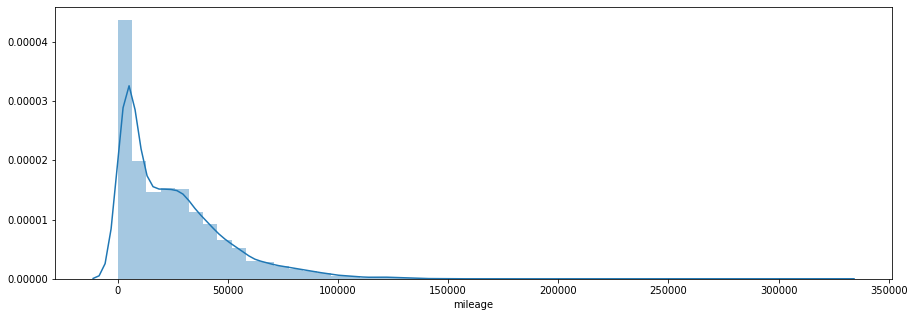

In [9]:
plt.subplots(figsize=(15,5))
sns.distplot(df_audi['mileage'])

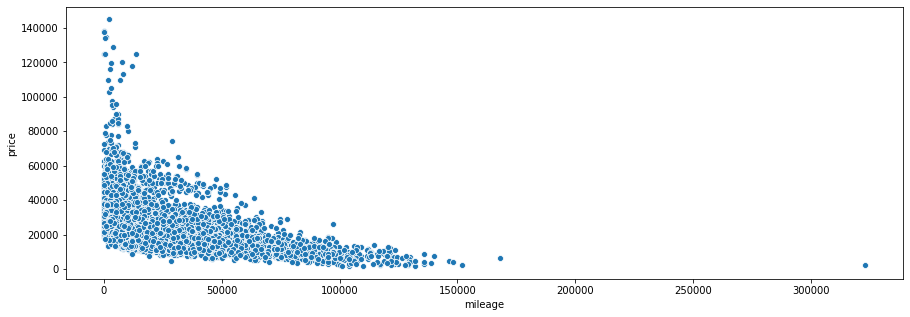

In [10]:
plt.subplots(figsize=(15,5))
sns.scatterplot(df_audi['mileage'], df_audi['price'])

### From the graph of the dependence (price / mile age) it can be seen that the price tends to decrease with increasing mile age


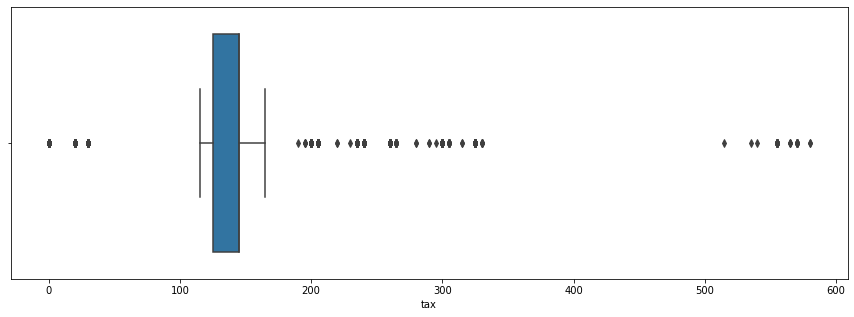

In [11]:
plt.subplots(figsize=(15,5))
sns.boxplot(df_audi['tax'])

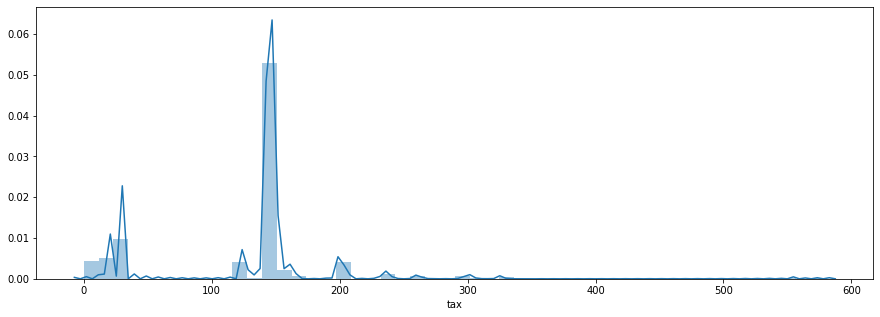

In [12]:
plt.subplots(figsize=(15,5))
sns.distplot(df_audi['tax'])

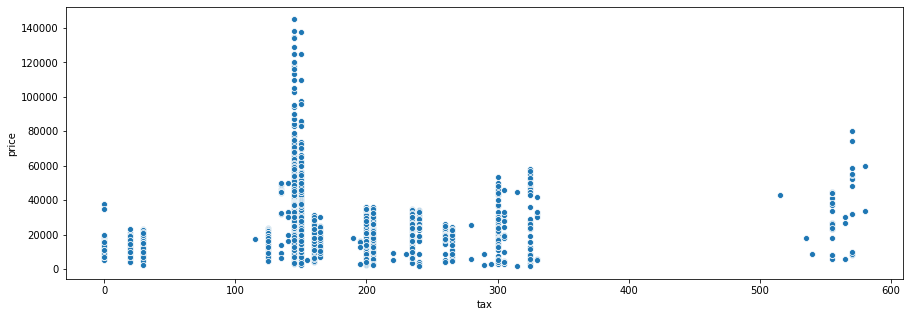

In [13]:
plt.subplots(figsize=(15,5))
sns.scatterplot(df_audi['tax'], df_audi['price'])

### There is no relationship between price and tax

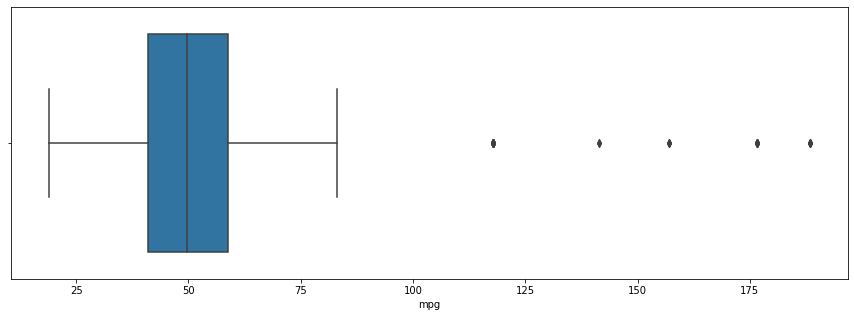

In [15]:
plt.subplots(figsize=(15,5))
sns.boxplot(df_audi['mpg'])

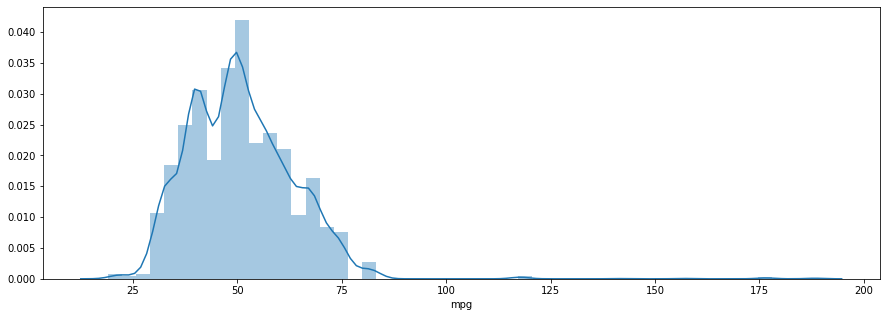

In [16]:
plt.subplots(figsize=(15,5))
sns.distplot(df_audi['mpg'])

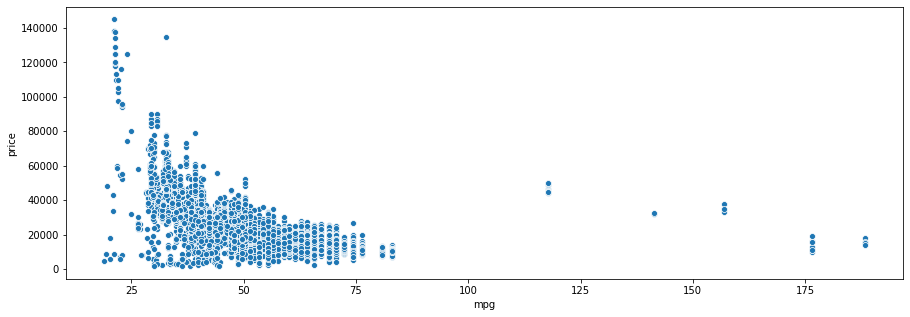

In [17]:
plt.subplots(figsize=(15,5))
sns.scatterplot(df_audi['mpg'], df_audi['price'])

### From the plot of the dependence (price / mpg) it can be seen that the price tends to decrease with increasing mpg

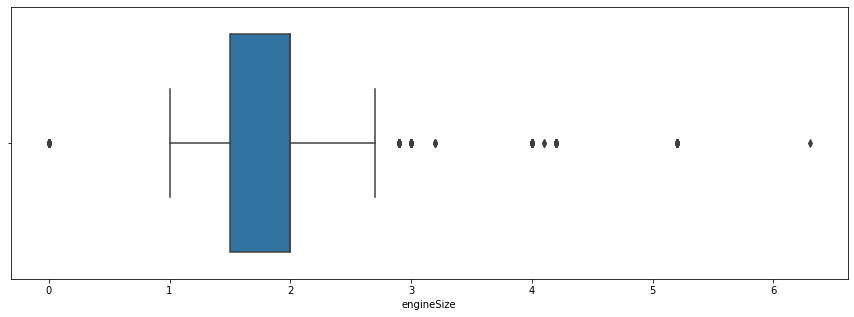

In [18]:
plt.subplots(figsize=(15,5))
sns.boxplot(df_audi['engineSize'])

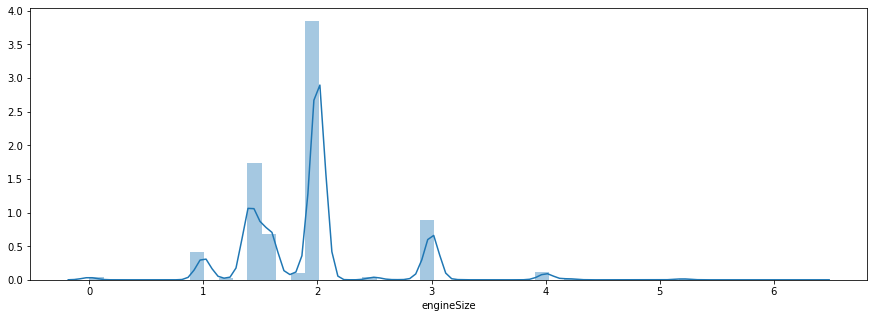

In [19]:
plt.subplots(figsize=(15,5))
sns.distplot(df_audi['engineSize'])

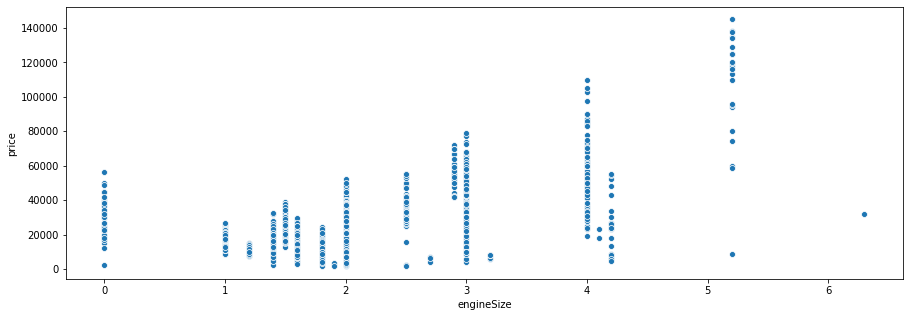

In [20]:
plt.subplots(figsize=(15,5))
sns.scatterplot(df_audi['engineSize'], df_audi['price'])

### From the graph of dependence (price / engine size) it can be seen that the price tends to increase with increasing engine size

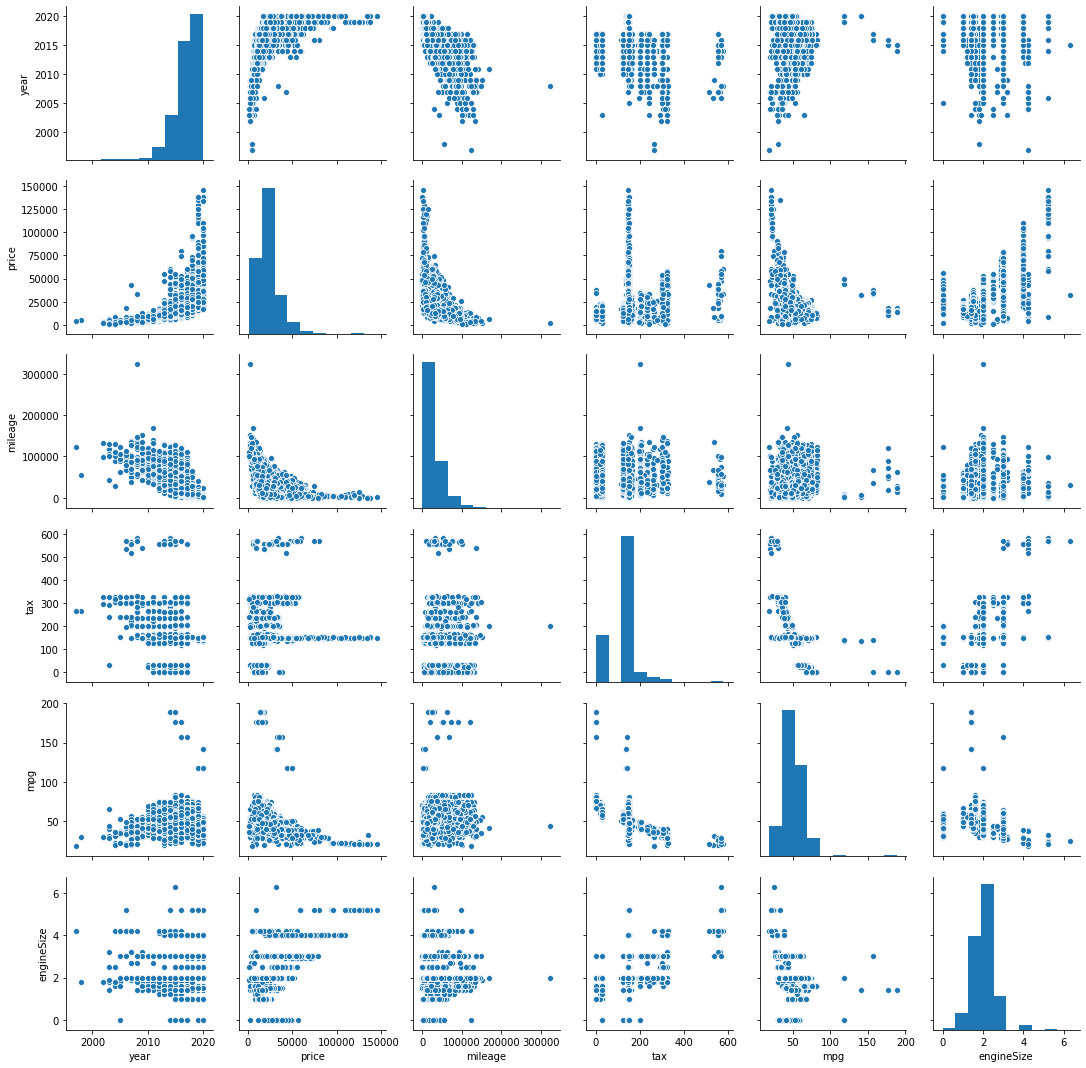

In [21]:
sns.pairplot(df_audi)

### Next, we convert the nominal variables to quantitative

In [22]:
df_audi_dummy = pd.get_dummies(df_audi)
df_audi_dummy.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2016,11000,29946,30,55.4,1.4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2017,16800,25952,145,67.3,2.0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


### Next, we will normalize our data.

In [23]:
std = StandardScaler()
df_audi_dummy_std = std.fit_transform(df_audi_dummy)
df_audi_dummy_std = pd.DataFrame(df_audi_dummy_std, columns = df_audi_dummy.columns)
df_audi_dummy_std.head()

,year,price,mileage,tax,mpg,engineSize,model_ A1,model_ A2,model_ A3,model_ A4,...,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,-0.046450,-0.887521,-0.386836,0.357147,0.357550,-0.880218,2.630555,-0.009682,-0.469824,-0.385620,...,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165
1,-0.507834,-0.546058,0.483989,-1.578323,1.037130,0.114925,-0.380148,-0.009682,-0.469824,-0.385620,...,-0.019367,-0.038756,-0.027395,-0.180334,1.714479,-0.832828,-0.712333,0.955435,-0.051299,-0.950421
2,-0.507834,-1.015570,0.217781,-1.429440,0.357550,-0.880218,2.630555,-0.009682,-0.469824,-0.385620,...,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165
3,-0.046450,-0.520448,0.047853,0.282706,1.276528,0.114925,-0.380148,-0.009682,-0.469824,2.593229,...,-0.019367,-0.038756,-0.027395,-0.180334,1.714479,-0.832828,-0.712333,0.955435,-0.051299,-0.950421
4,0.876318,-0.477766,-0.971285,0.282706,-0.090355,-1.543647,-0.380148,-0.009682,2.128456,-0.385620,...,-0.019367,-0.038756,-0.027395,-0.180334,-0.583268,1.200728,-0.712333,-1.046643,-0.051299,1.052165


### Let's divide the data into two sets: for training the model and for testing the model.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_audi_dummy_std.drop(columns = ['price']), df_audi_dummy_std[['price']],
                                                    test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8001, 37)
(2667, 37)
(8001, 1)
(2667, 1)


### We use the SelectKBest class from the Scikit-Learn library to determine the effective number of variables that affect the target (price). For regression models.

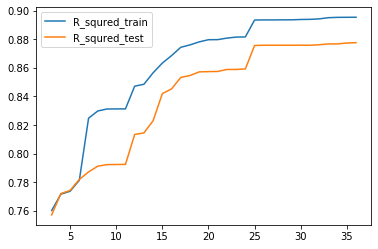

In [28]:
column_names = df_audi_dummy.drop(columns = ['price']).columns

amount_features = []
R_squred_train = []
R_squred_test = []

for k in range(3, 37, 1):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    amount_features.append(k)
    R_squred_train.append(regressor.score(X_train_transformed, y_train))
    R_squred_test.append(regressor.score(X_test_transformed, y_test))

sns.lineplot(x = amount_features, y = R_squred_train, legend = 'full', label="R_squred_train")
sns.lineplot(x = amount_features, y = R_squred_test, legend = 'full', label="R_squred_test")

### The graph shows that R-squred does not change much after K = 25.

### Train a model with 25 variables that are selected using SelectKBest

In [29]:
selector = SelectKBest(f_regression, k = 25)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
column_names[selector.get_support()]

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ A1', 'model_ A3',
       'model_ A4', 'model_ A7', 'model_ A8', 'model_ Q5', 'model_ Q7',
       'model_ Q8', 'model_ R8', 'model_ RS3', 'model_ RS4', 'model_ RS5',
       'model_ RS6', 'model_ SQ5', 'model_ SQ7', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Petrol'],
      dtype='object')

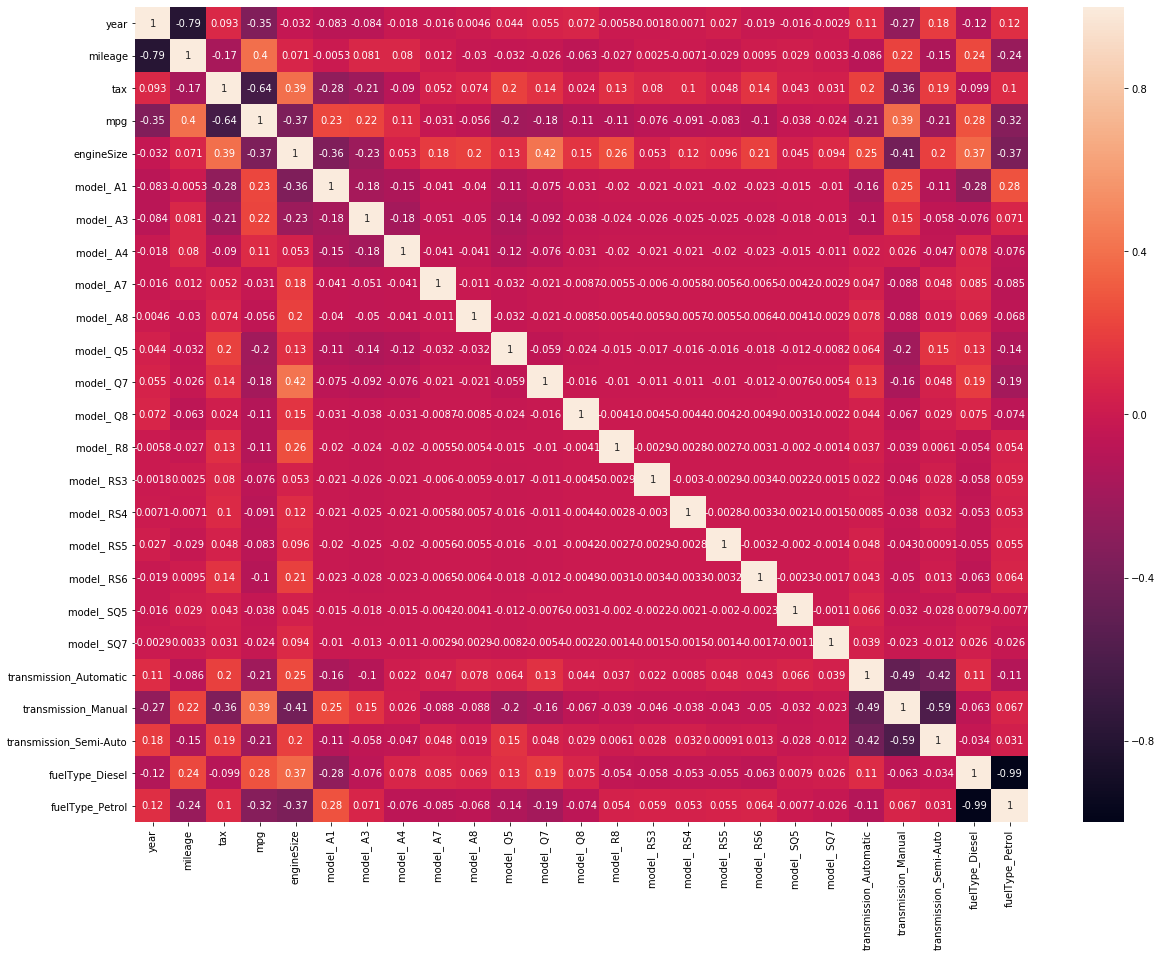

In [30]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_audi_dummy[column_names[selector.get_support()]].corr(), vmin=-1, vmax=1, annot = True)

### Let's define a function that will select the most efficient regression model from the list based on the highest R-squared

In [32]:
def regression_model(model):
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [33]:
model_performance = pd.DataFrame(columns = ["Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Model": regressor, "Score": score}, ignore_index=True)

model_performance

,Model,Score
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.875594
1,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.875577
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",-0.000345
3,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.923632
4,"(DecisionTreeRegressor(criterion='mse', max_de...",0.956822
5,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.942267


### From the table we determine that the highest R-squared is in the RandomForestRegressor model (DecisionTreeRegressor)

### Next, we train and test the RandomForestRegressor model

In [35]:
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)
print(regressor.score(X_train_transformed, y_train))
print(regressor.score(X_test_transformed, y_test))

0.990949605131974
0.9569506861381694


In [36]:
y_hat = regressor.predict(X_test_transformed)

In [37]:
y_hat

array([-0.04919503, -0.85927381,  1.87666386, ...,  0.67974497,
       -0.94810547, -0.47796185])

### We visualize the actual price values and the predicted values

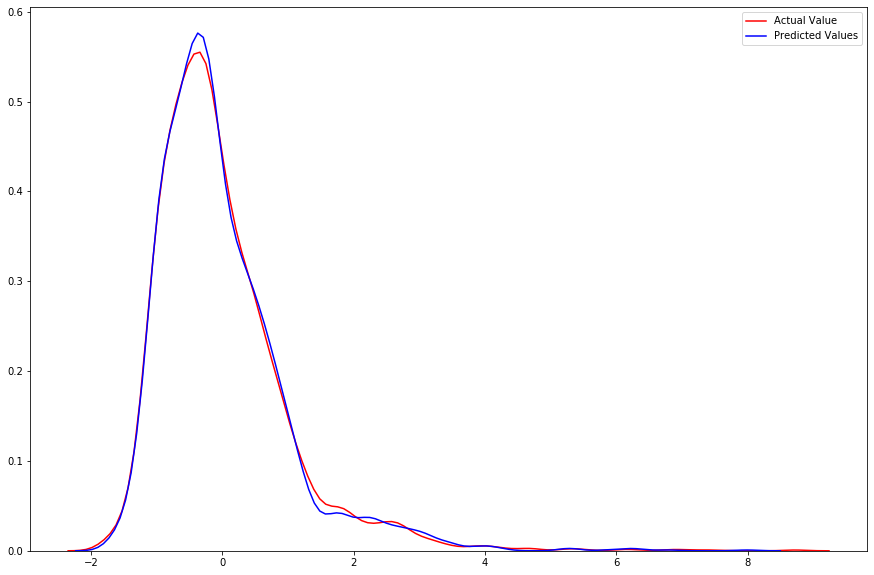

In [38]:
plt.figure(figsize=(15, 10))
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)

### Next, let's look at the cross-validation results

In [39]:
Rcross = cross_val_score(regressor, X_train_transformed, y_train, cv = 10)
Rcross

array([0.93958951, 0.95992511, 0.96078989, 0.94855797, 0.95566253,
       0.95225301, 0.96261119, 0.96039856, 0.95123361, 0.95400978])

## As you can see, the selected regression model using the SelectKBest class shows very high results in predicting the price of AUDI cars and can be successfully applied to solving real problems.